# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_data = []
print("Beginning Data Retreival")
print("___________________________")
i=0
j=1
counter=1
settings = {"units":"metric","appid":api_key}
extracts = ["name","clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]
# Build query URL
for city in cities:
    print(f"Processing Record {i} of Set {j} | {city}")
    
    try:
        weather_json = ow.get_current(city,**settings)
        weather_data.append(weather_json(*extracts))
    except :
        print("City not found. Skipping...")
        cities.remove(city)
    i=i+1
    counter=counter+1
    if i==50:
        j=j+1
        i=0
            

print("___________________________")
print("Data Retreival Complete")
print("___________________________")

# Get the temperature from the response


Beginning Data Retreival
___________________________
Processing Record 0 of Set 1 | palmas
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 3 of Set 1 | nemesnadudvar
Processing Record 4 of Set 1 | batemans bay
Processing Record 5 of Set 1 | mogadishu
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | vardo
Processing Record 14 of Set 1 | hirara
Processing Record 15 of Set 1 | lafayette
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | terney
Processing Record 18 of Set 1 | okhotsk
Processing Record 19 of Set 1 | pochutla
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | alice springs
Processing Rec

Processing Record 39 of Set 4 | conceicao do araguaia
Processing Record 40 of Set 4 | sobolevo
Processing Record 41 of Set 4 | vila velha
Processing Record 42 of Set 4 | pangnirtung
Processing Record 43 of Set 4 | ust-nera
Processing Record 44 of Set 4 | awbari
Processing Record 45 of Set 4 | grajau
City not found. Skipping...
Processing Record 46 of Set 4 | new norfolk
Processing Record 47 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 4 | gigmoto
Processing Record 49 of Set 4 | nhulunbuy
Processing Record 0 of Set 5 | cabo san lucas
Processing Record 1 of Set 5 | qasigiannguit
Processing Record 2 of Set 5 | strehaia
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | palmer
Processing Record 5 of Set 5 | ondjiva
Processing Record 6 of Set 5 | barrow
Processing Record 7 of Set 5 | san quintin
Processing Record 8 of Set 5 | korla
City not found. Skipping...
Processing Record 9 of Set 5 | san cristobal
Processing Record 10 of Set 5 | por

Processing Record 24 of Set 8 | ajdabiya
Processing Record 25 of Set 8 | kiblawan
Processing Record 26 of Set 8 | ostrovnoy
Processing Record 27 of Set 8 | moshkovo
Processing Record 28 of Set 8 | klichka
Processing Record 29 of Set 8 | olafsvik
City not found. Skipping...
Processing Record 30 of Set 8 | poum
Processing Record 31 of Set 8 | borogontsy
Processing Record 32 of Set 8 | valparaiso
Processing Record 33 of Set 8 | nova paka
Processing Record 34 of Set 8 | puerto madryn
Processing Record 35 of Set 8 | dargaville
Processing Record 36 of Set 8 | marzuq
Processing Record 37 of Set 8 | kurchum
Processing Record 38 of Set 8 | kendari
Processing Record 39 of Set 8 | bay roberts
Processing Record 40 of Set 8 | ardmore
Processing Record 41 of Set 8 | galle
Processing Record 42 of Set 8 | guerrero negro
Processing Record 43 of Set 8 | aketi
Processing Record 44 of Set 8 | aksarka
Processing Record 45 of Set 8 | yarada
Processing Record 46 of Set 8 | marystown
Processing Record 47 of S

Processing Record 8 of Set 12 | ust-uda
Processing Record 9 of Set 12 | abbeville
Processing Record 10 of Set 12 | maragogi
Processing Record 11 of Set 12 | diffa
Processing Record 12 of Set 12 | santa ana
___________________________
Data Retreival Complete
___________________________


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_pd = pd.DataFrame(weather_data)
weather_pd = weather_pd.rename(columns={0:"City",
                                        1:"Cloudiness",
                                        2:"Country",
                                        3:"Date",
                                        4:"Humidity",
                                        5:"Lat",
                                        6:"Lng",
                                        7:"Max Temp",
                                        8:"Wind Speed"})
weather_pd.to_csv("output.csv",sep=",")
weather_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Palmas,40,BR,1551891600,94,-10.18,-48.33,25.00,3.10
1,Port Alfred,12,ZA,1551895310,80,-33.59,26.89,27.78,2.68
2,Nemesnadudvar,8,HU,1551895567,59,46.34,19.05,9.02,4.48
3,Batemans Bay,0,AU,1551895527,65,-35.71,150.18,11.67,1.79
4,Mogadishu,56,SO,1551895567,98,2.04,45.34,27.27,9.33


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

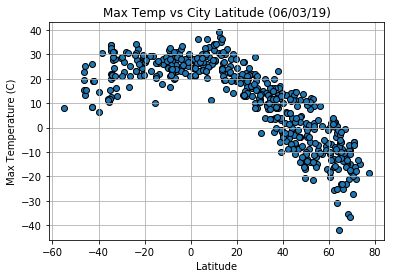

In [20]:
plt.scatter(weather_pd["Lat"],weather_pd["Max Temp"],edgecolors="black")
plt.title("Max Temp vs City Latitude (06/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.savefig("../Images/max_temp_vs_lat.png")
a=plt.show()
a

#### Latitude vs. Humidity Plot

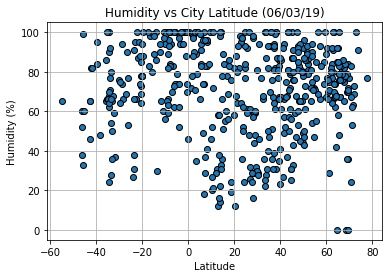

In [21]:
plt.scatter(weather_pd["Lat"],weather_pd["Humidity"],edgecolors="black")
plt.title("Humidity vs City Latitude (06/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../Images/Humidty_vs_Lat.png")
b=plt.show()
b

#### Latitude vs. Cloudiness Plot

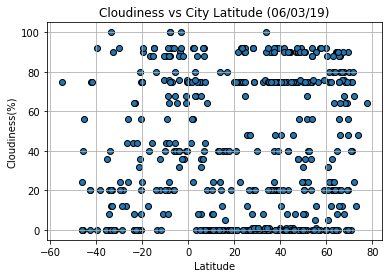

In [22]:
plt.scatter(weather_pd["Lat"],weather_pd["Cloudiness"],edgecolors="black")
plt.title("Cloudiness vs City Latitude (06/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig("../Images/Cloudiness_vs_Lat.png")
c=plt.show()
c

#### Latitude vs. Wind Speed Plot

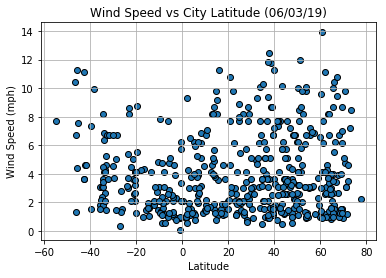

In [23]:
plt.scatter(weather_pd["Lat"],weather_pd["Wind Speed"],edgecolors="black")
plt.title("Wind Speed vs City Latitude (06/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/Wind_Speed_vs_Lat.png")
d=plt.show()
d

Noticeable Trends based on the data:
- As we are currently in the Northern Hemisphere's winter, the maximum temperature decreases as the positive latitude increases (the further away you are from the equator in the Northern Hemisphere, the colder it gets)
- Temperatures are highest near the equator (latitude 0)
- Wind speeds and cloudiness do not seem to correlate with lattitude